In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
install.packages("kknn")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

In [2]:
data <- read_csv("data/heart_failure_clinical_records_dataset.csv.xls")
data

Rows: 299 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (13): age, anaemia, creatinine_phosphokinase, diabetes, ejection_fractio...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
75,0,582,0,20,1,265000,1.9,130,1,0,4,1
55,0,7861,0,38,0,263358,1.1,136,1,0,6,1
65,0,146,0,20,0,162000,1.3,129,1,1,7,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
45,0,2060,1,60,0,742000,0.8,138,0,0,278,0
45,0,2413,0,38,0,140000,1.4,140,1,1,280,0
50,0,196,0,45,0,395000,1.6,136,1,1,285,0


In [4]:
data_wrangled <- data |> 
            select(age, diabetes, serum_creatinine, ejection_fraction, high_blood_pressure, smoking, DEATH_EVENT) |>
            mutate(DEATH_EVENT = as_factor(DEATH_EVENT)) |>
            mutate(DEATH_EVENT = fct_recode(DEATH_EVENT, "Yes" = "0", "No" = "1")) |>
            rename("survived" = "DEATH_EVENT") |>
            mutate(diabetes = as.logical(diabetes)) |>
            mutate(high_blood_pressure = as.logical(high_blood_pressure)) |>
            mutate(smoking = as.logical(smoking)) 

data_wrangled

age,diabetes,serum_creatinine,ejection_fraction,high_blood_pressure,smoking,survived
<dbl>,<lgl>,<dbl>,<dbl>,<lgl>,<lgl>,<fct>
75,FALSE,1.9,20,TRUE,FALSE,No
55,FALSE,1.1,38,FALSE,FALSE,No
65,FALSE,1.3,20,FALSE,TRUE,No
⋮,⋮,⋮,⋮,⋮,⋮,⋮
45,TRUE,0.8,60,FALSE,FALSE,Yes
45,FALSE,1.4,38,FALSE,TRUE,Yes
50,FALSE,1.6,45,FALSE,TRUE,Yes


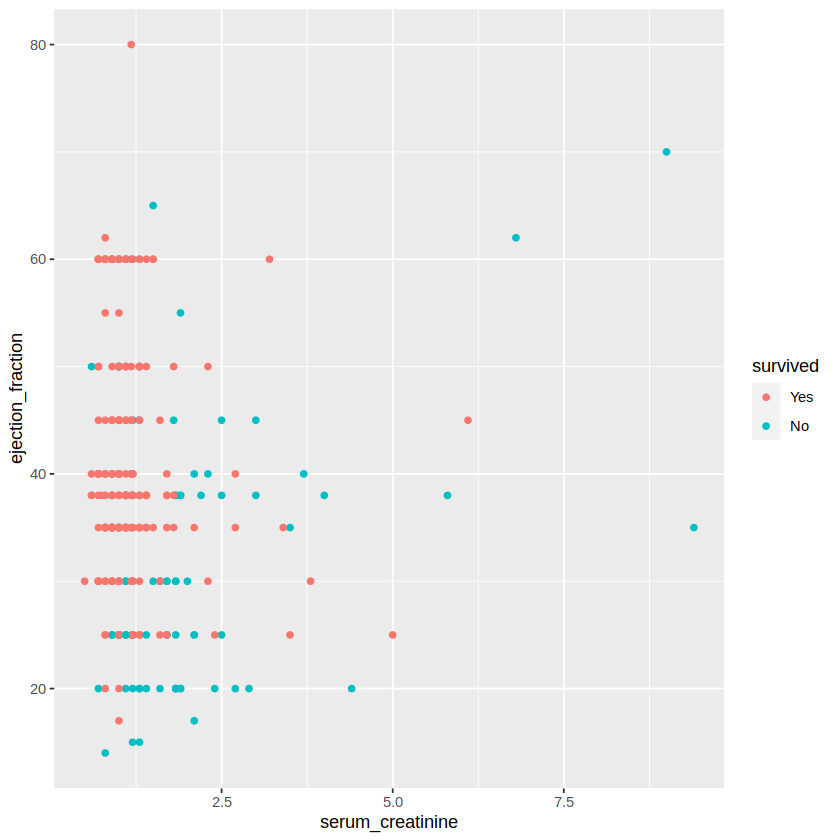

In [7]:
test <- data_wrangled |>
        ggplot(aes(x = serum_creatinine, y = ejection_fraction, color = survived)) +
        geom_point() 
test